# Classifying Electrocardiograms

## (1) Electrocardiograms

👇 Import the [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) dataset and display its first 5 rows

In [203]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [204]:
import pandas as pd
pd.set_option("display.max_columns", None)

data = pd.read_csv('data/electrocardiograms.csv')

data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110,x_111,x_112,x_113,x_114,x_115,x_116,x_117,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,x_128,x_129,x_130,x_131,x_132,x_133,x_134,x_135,x_136,x_137,x_138,x_139,x_140,x_141,x_142,x_143,x_144,x_145,x_146,x_147,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,x_158,x_159,x_160,x_161,x_162,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172,x_173,x_174,x_175,x_176,x_177,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,0.511236,0.520599,0.548689,0.599251,0.606742,0.640449,0.664794,0.730337,0.780899,0.852060,0.897004,0.953184,0.970037,1.000000,0.992509,0.985019,0.943820,0.898876,0.823970,0.752809,0.711610,0.666667,0.602996,0.576779,0.597378,0.670412,0.595506,0.513109,0.423221,0.277154,0.119850,0.082397,0.022472,0.039326,0.054307,0.063670,0.198502,0.303371,0.355805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,0.308929,0.305357,0.291071,0.285714,0.283929,0.271429,0.255357,0.264286,0.260714,0.251786,0.241071,0.226786,0.217857,0.200000,0.173214,0.164286,0.160714,0.155357,0.141071,0.144643,0.155357,0.167857,0.175000,0.192857,0.223214,0.251786,0.255357,0.276786,0.310714,0.323214,0.323214,0.326786,0.342857,0.346429,0.339286,0.342857,0.348214,0.346429,0.335714,0.335714,0.339286,0.341071,0.342857,0.357143,0.358929,0.328571,0.308929,0.360714,0.455357,0.457143,0.366071,0.205357,0.114286,0.048214,0.000000,0.041071,0.101786,0.146429,0.187500,0.246429,0.301786,0.351786,0.382143,0.387500,0.398214,0.407143,0.407143,0.410714,0.421429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

💓 Each observation of the dataset is a sequence of measured heartbeats, taken from a patient's electrocardiogram (ECG).

🎯 The target is binary and defines whether the heartbeat shows:
* a risk of cardiovascular disease 🔴 (1)
* or not 🟢 (0)

## (2) Data Exploration

❓ **Question** ❓

Plot an observation of each target class to get a visual idea of what the numbers represent.

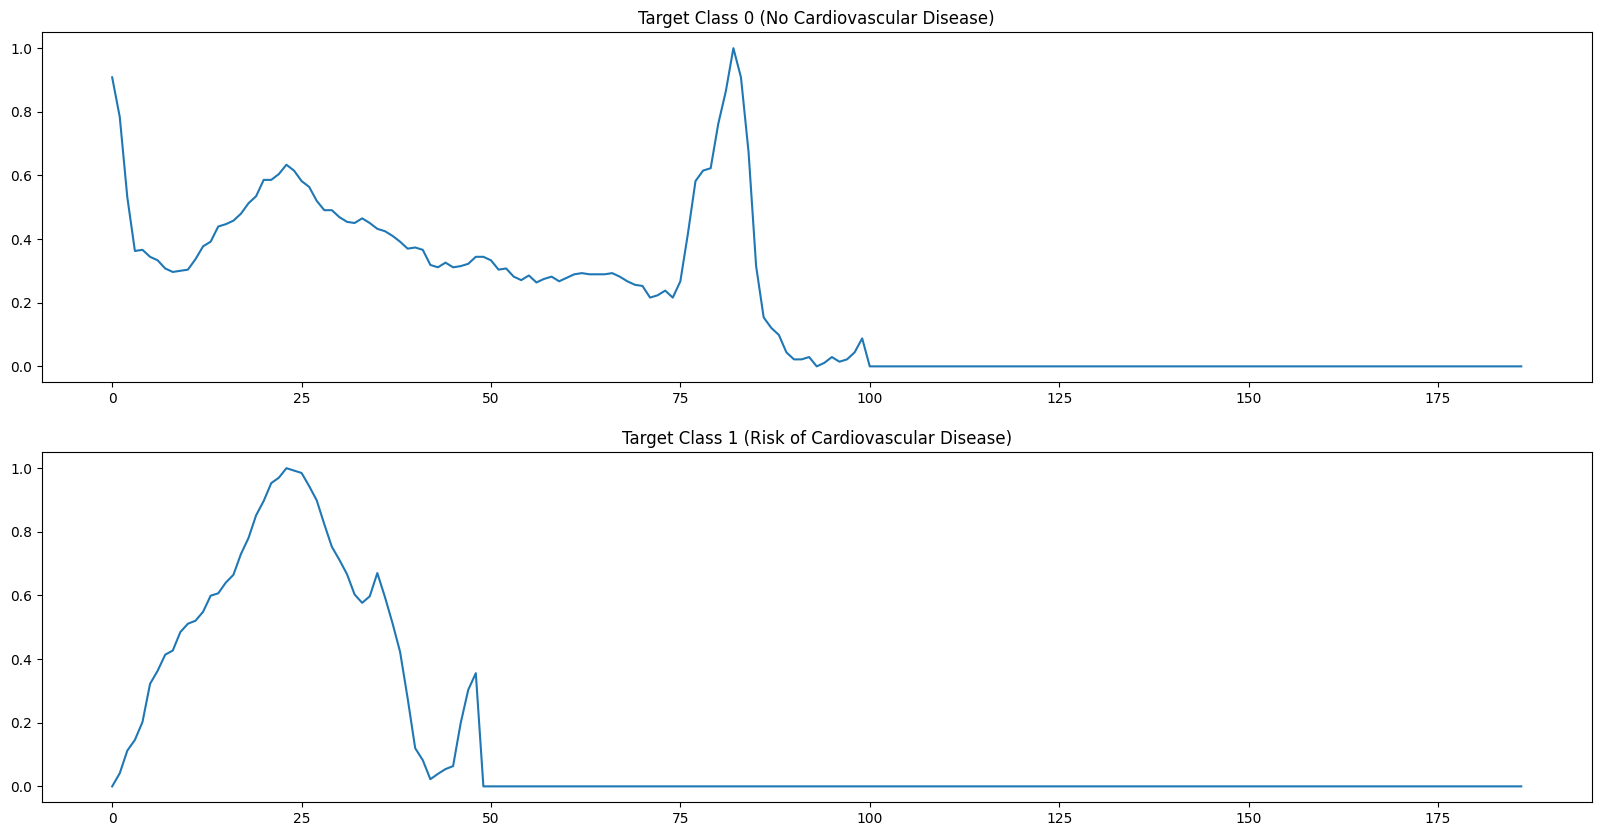

In [205]:
# YOUR CODE HERE
# Select one observation from each target class
class_0_observation = data[data['target'] == 0].iloc[0, :-1].values
class_1_observation = data[data['target'] == 1].iloc[0, :-1].values

# Plot the observations
fig, ax = plt.subplots(nrows=2, figsize=(20, 10))
ax[0].plot(class_0_observation)
ax[0].set_title("Target Class 0 (No Cardiovascular Disease)")
ax[1].plot(class_1_observation)
ax[1].set_title("Target Class 1 (Risk of Cardiovascular Disease)")
plt.show()

❓ **Questions** ❓

* How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [206]:
# YOUR CODE HERE
at_risk_count = data['target'].value_counts()[1]
at_risk_count

1448

* How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [207]:
# YOUR CODE HERE
healthy_count = data['target'].value_counts()[0]
healthy_count

18117

👩🏻‍🏫 In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution to train the model based on reality, and adapt our modeling approach accordingly.

[Centers for Disease Control and Prevention - Heart Disease Facts](https://www.cdc.gov/heartdisease/facts.htm)

🧪 **Check your code**

In [208]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-electrocardiograms/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_class_balance.py::TestClass_balance::test_at_risk_count PASSED      [ 50%]
test_class_balance.py::TestClass_balance::test_healthy_count PASSED      [100%]

============================== 2 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master



##  (3) Logistic Regression

🎯 Your task is to **flag heartbeats that are at risk of cardiovascular diseases.**

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use a ***cross-validation to evaluate the model*** on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [209]:
# YOUR CODE HERE

X = data.drop('target', axis=1)
y = data['target']

lr_model = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'recall', 'precision', 'f1']

cv_scores = cross_validate(lr_model, X, y, cv=5, scoring=scoring)
cv_scores


{'fit_time': array([1.46671867, 1.55521679, 2.00898075, 1.25756192, 1.59942365]),
 'score_time': array([0.01319599, 0.02289748, 0.02494264, 0.02795506, 0.03839087]),
 'test_accuracy': array([0.93892154, 0.93892154, 0.93994378, 0.93841043, 0.93968822]),
 'test_recall': array([0.29655172, 0.35517241, 0.36206897, 0.32871972, 0.30795848]),
 'test_precision': array([0.7107438 , 0.66451613, 0.67741935, 0.66901408, 0.712     ]),
 'test_f1': array([0.41849148, 0.46292135, 0.47191011, 0.44083527, 0.42995169])}

❓ **Question (Ratio of correct predictions)** ❓ 

What is the ratio of correct predictions for this model ? Save your answer under variable name `correct_pred_ratio`.

In [210]:
# YOUR CODE HERE
correct_pred_ratio = np.mean(cv_scores['test_accuracy'])
correct_pred_ratio

0.9391771019677997

❓ **Question (Ability to flag at-risk patients)** ❓ 

What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [211]:
# YOUR CODE HERE
flag_ratio = np.mean(cv_scores['test_recall'])
flag_ratio

0.3300942608280635

❓ **Question (Ability to flag correctly)** ❓ 

When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [212]:
# YOUR CODE HERE
correct_detection_ratio = np.mean(cv_scores['test_precision'])
correct_detection_ratio

0.6867386740061804

❓ **Question (Detecting as many at-risk patients as possible without too many false alarms)** ❓ 

What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [213]:
# YOUR CODE HERE
aggregated_metric = np.mean(cv_scores['test_f1'])
aggregated_metric

0.44482198050033483

🧪 **Check your code**

In [214]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-electrocardiograms/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

git commit -m 'Completed logistic_r

▶️ Run the following cell before moving on:

In [215]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 33.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Confusion Matrix

👇 Using `ConfusionMatrixDisplay` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

    
1. [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)    
2. [from_predictions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)
    
- Don't forget to to go back to the **Holdout method** to [`train-test-split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) your dataset and look at the confusion matrix on the test set.  
</details>



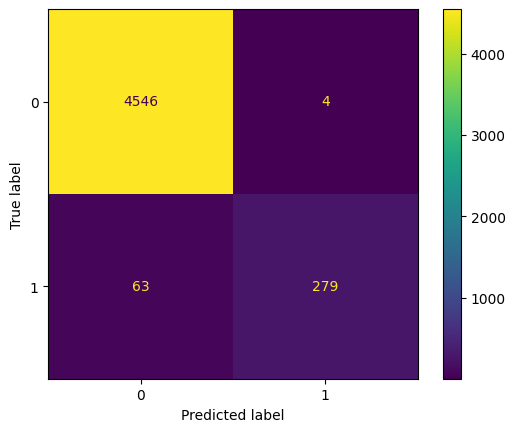

In [216]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts the heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a **high accuracy**. However, this also causes it to miss out on many at-risk heartbeats: it has **bad recall**...

👉 This model is therefore poor at the task of **flagging at-risk observations**.

❗️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ❗️

## (5) KNN Classifier

❓ **Question (Classification Model Selection)** ❓ 

Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [217]:
# YOUR CODE HERE
best_model = "KNN"

💪 For this ECG dataset, the KNN Classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.

🧪 **Check your code**

In [218]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-electrocardiograms/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



## (6) Classification Report

Now that we have selected the KNN model thanks to its higherbest recall, let's have a look at the other classification performance metrics>

❓ **Question (Classification Report)** ❓

Print out a [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) of the KNN model.

<details>
    <summary> 💡 <i>Hint</i>  </summary>
    
* You will need to pass the predictions of the model to a `classification_report`.
    
* SkLearn's [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) might help 😉
</details>




In [219]:
# YOUR CODE HERE

knn_model = KNeighborsClassifier()

y_pred = cross_val_predict(knn_model, X, y, cv=5)

report = classification_report(y, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18117
           1       0.94      0.86      0.90      1448

    accuracy                           0.99     19565
   macro avg       0.96      0.93      0.94     19565
weighted avg       0.99      0.99      0.99     19565



❓ **Question (Reading the report)** ❓


Among the heartbeats predicted at-risk, what is the ratio of correct predictions ? 

In mathematical terms, can you read the ratio $ \frac{TP}{TP + FP} $ in the report? What is the name of this classification metrics ? 

Save your answer as a float under `correct_at_risk_predictions`

In [220]:
# YOUR CODE HERE
correct_at_risk_predictions = 0.94
correct_at_risk_predictions

0.94

🧪 **Check your code**

In [221]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_at_risk_predictions)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-electrocardiograms/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_precision.py::TestPrecision::test_precision PASSED                  [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master



## (7) Prediction

❓ **Question (Predicting)** ❓

A patient comes to you for a second opinion because  he was told that based on his heartbeats, this patient may be at-risk.  

According to your optimal model, is he at-risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [222]:
new_patient = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110,x_111,x_112,x_113,x_114,x_115,x_116,x_117,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,x_128,x_129,x_130,x_131,x_132,x_133,x_134,x_135,x_136,x_137,x_138,x_139,x_140,x_141,x_142,x_143,x_144,x_145,x_146,x_147,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,x_158,x_159,x_160,x_161,x_162,x_163,x_164,x_165,x_166,x_167,x_168,x_169,x_170,x_171,x_172,x_173,x_174,x_175,x_176,x_177,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,0.321995,0.192744,0.147392,0.129252,0.099773,0.092971,0.068027,0.068027,0.061224,0.040816,0.034014,0.027211,0.013605,0.00907,0.0,0.006803,0.0,0.011338,0.015873,0.031746,0.054422,0.092971,0.113379,0.160998,0.185941,0.208617,0.219955,0.240363,0.231293,0.226757,0.231293,0.238095,0.235828,0.235828,0.24263,0.249433,0.253968,0.258503,0.258503,0.256236,0.253968,0.265306,0.263039,0.272109,0.265306,0.260771,0.263039,0.267574,0.267574,0.274376,0.258503,0.265306,0.263039,0.267574,0.272109,0.263039,0.260771,0.274376,0.269841,0.274376,0.276644,0.269841,0.267574,0.274376,0.292517,0.303855,0.321995,0.337868,0.337868,0.340136,0.319728,0.297052,0.285714,0.269841,0.269841,0.274376,0.269841,0.274376,0.267574,0.260771,0.371882,0.639456,0.959184,0.807256,0.444444,0.29932,0.272109,0.278912,0.253968,0.258503,0.251701,0.256236,0.247166,0.265306,0.265306,0.267574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
# YOUR CODE HERE
knn_model.fit(X_train, y_train)
prediction = knn_model.predict(new_patient)

prediction = 'at risk' if prediction[0] == 1 else 'healthy'


🧪 **Check your code**

In [228]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-electrocardiograms/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction_at_risk PASSED       [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



🏁 Congratulations!

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!